# РК1
### Студент: Широков Павел Юрьевич 
### Группа: ИУ5-21М
### Номер по списку группы (вариант): 15

#### Вариант задачи №1 - 15

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "возведение в степень".

#### Вариант задачи №2 - 35

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе дерева решений.

#### Дополнительное задание (по группам)
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".


##Импортирование необходимых библиотек

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline 
sns.set(style="ticks")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Задача 1 (№15)
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "возведение в степень".

Произведем загрузку данных и выведем распределения признаков

In [17]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [53]:
data = pd.read_csv("/content/drive/MyDrive/data/seattle-weather.csv", sep=",")

В качестве анализируемых данных взят датасет для предсказания погоды (ливень, морось, снег и т.д.)

In [37]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [39]:
# Количество пропусков (проверка пригодности датасета)
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na
# столбцов с пропусками нет

[]

In [59]:

# В ходе 1 этапа выделяем новые столбцы. Выделим год и месяц, а дату можно удалить, так как она будет неудобна для анализа
data['month'] = data['date'].map(lambda x: int(x[5:7]))
data['year'] = data['date'].map(lambda x: int(x[:4]))
data = data.drop(['date'], axis=1)
data.head(100)

,precipitation,temp_max,temp_min,wind,weather,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rain,1,2012
2,0.8,11.7,7.2,2.3,rain,1,2012
3,20.3,12.2,5.6,4.7,rain,1,2012
4,1.3,8.9,2.8,6.1,rain,1,2012
...,...,...,...,...,...,...,...
95,4.6,9.4,2.8,1.8,snow,4,2012
96,0.3,11.1,3.3,2.6,rain,4,2012
97,0.0,16.1,1.7,4.3,sun,4,2012
98,0.0,21.1,7.2,4.1,sun,4,2012


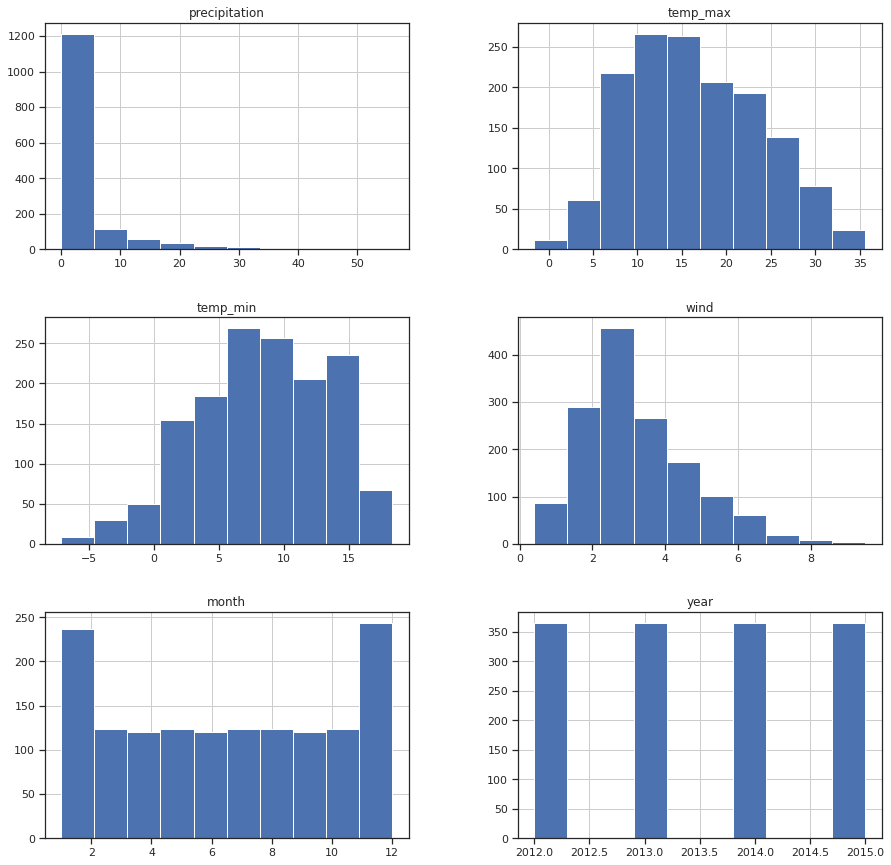

In [60]:
data.hist(figsize=(15,15))
plt.show()

###Исходное распределение на основе признака "wind"
Как видно, оно несколько отличается от нормального распределения

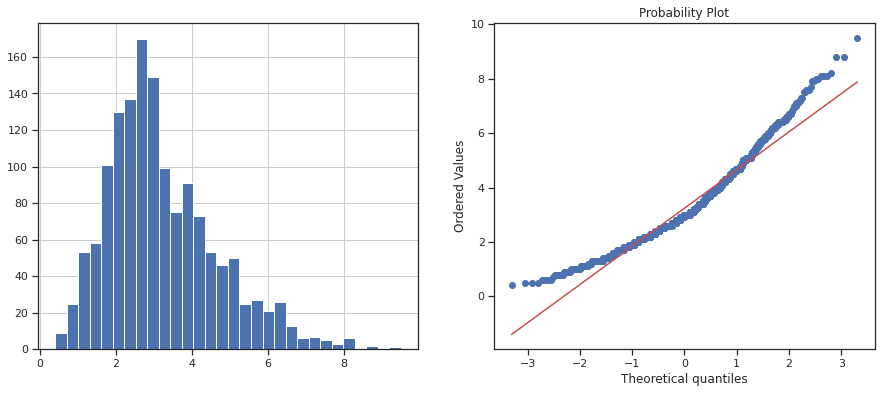

In [26]:
diagnostic_plots(data, 'wind')

Попробуем провести нормализацию с помощью функции "возведение в степень"

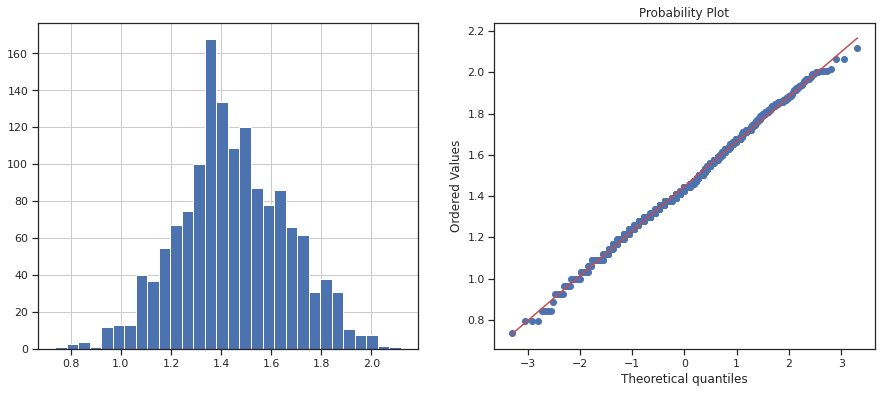

In [83]:
data['wind_exp3'] = data['wind']**(1/3) 
diagnostic_plots(data, 'wind_exp3')

Исходя из полученного графика, видно, что с помощью функции "возведение в степень" удалось успешно нормализовать признак "wind" (ветер) при степени 1/3

## Задача 2 (№35)
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе дерева решений.

Подготовим *DataFrame* на основе нашего набора данных из "Задания №1"

In [61]:
weather_X = data.drop('weather', 1).values
weather_y= data['weather'].values
weather_feature_names = list(data.drop('weather', 1).keys())
weather_x_df = pd.DataFrame(data=weather_X, columns=weather_feature_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(weather_X, weather_y)
rfc1.fit(weather_X, weather_y)
gbc1.fit(weather_X, weather_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.57896535, 0.10289092, 0.11311475, 0.1000567 , 0.0500262 ,
        0.05494608]), 1.0)

Функция для отображения результатов

In [63]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

Вывод результата полученного на основе метода "Решающее дерево"

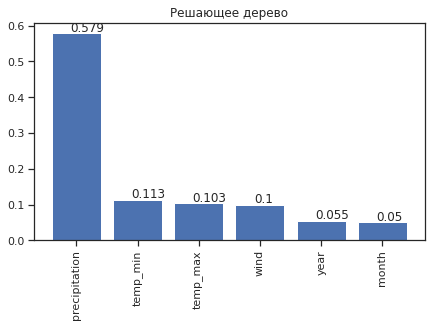

In [64]:
_,_=draw_feature_importances(dtc1, weather_x_df, 'Решающее дерево')

"*Хорошими*" и важными признакамии являются только признаки с флагом *True*. 

In [67]:
list(zip(weather_feature_names, SelectFromModel(dtc1).fit(weather_X, weather_y).get_support()))

[('precipitation', True),
 ('temp_max', False),
 ('temp_min', False),
 ('wind', False),
 ('month', False),
 ('year', False)]

Вывод результата полученного на основе метода "Градиентный бустинг"

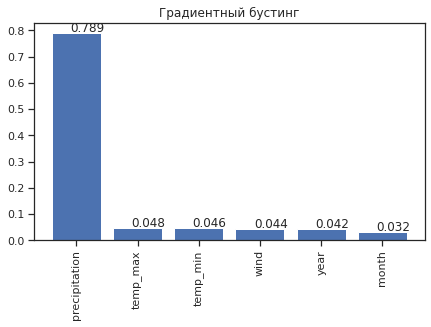

In [69]:
_,_=draw_feature_importances(gbc1, weather_x_df, 'Градиентный бустинг')

In [70]:
list(zip(weather_feature_names, SelectFromModel(gbc1).fit(weather_X, weather_y).get_support()))

[('precipitation', True),
 ('temp_max', False),
 ('temp_min', False),
 ('wind', False),
 ('month', False),
 ('year', False)]

Вывод результата полученного на основе метода "Случайный лес"

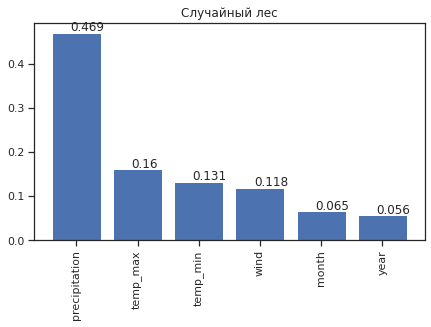

In [72]:
_,_=draw_feature_importances(rfc1, weather_x_df, 'Случайный лес')

В этом случае класс SelectFromModel выделил уже два "хороших" признака

In [73]:
list(zip(weather_feature_names, SelectFromModel(rfc1).fit(weather_X, weather_y).get_support()))

[('precipitation', True),
 ('temp_max', True),
 ('temp_min', False),
 ('wind', False),
 ('month', False),
 ('year', False)]

## Дополнительное задание
Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

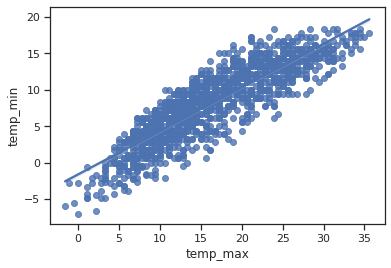

In [78]:
sns.regplot(x=data['temp_max'], y=data['temp_min'])

Построили график рассеяния, показывающий зависимость между двумя признаками: *temp_max* (максимальная температура) и *temp_min* (минимальная температура)